In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsRegressor

In [2]:
dr=pd.read_csv('winequality-red.csv') #for red coloured wine
dr.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7


In [3]:
dr.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
dr.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

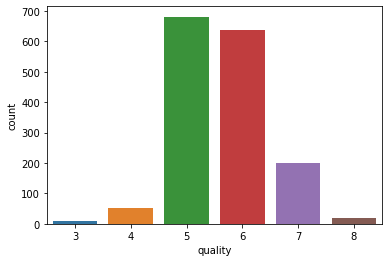

In [6]:
sns.countplot(x='quality',data=dr) #majority wine quality is 5 and 6.

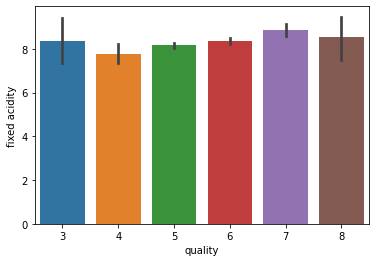

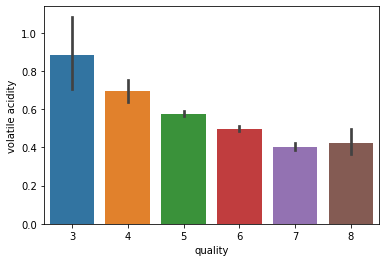

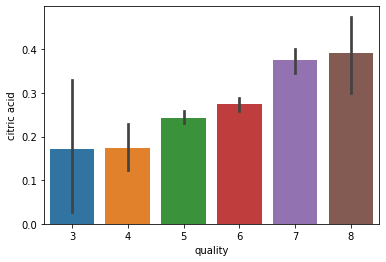

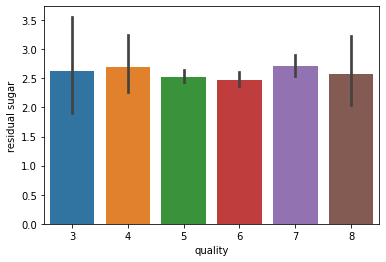

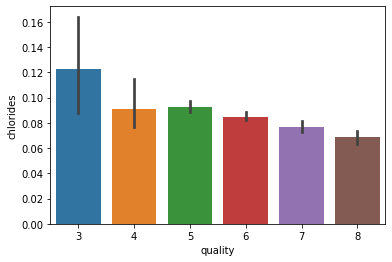

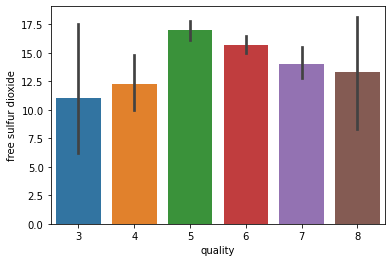

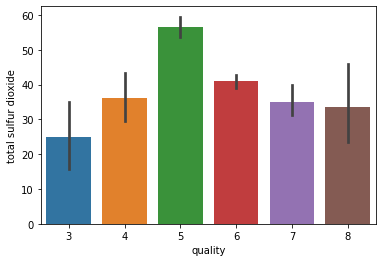

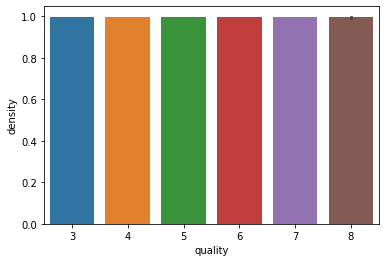

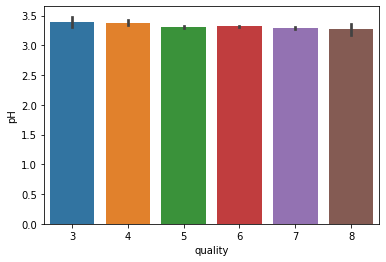

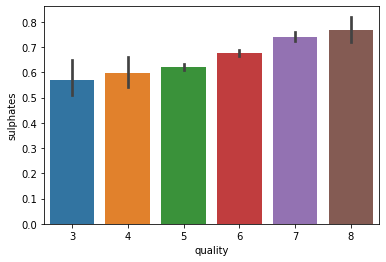

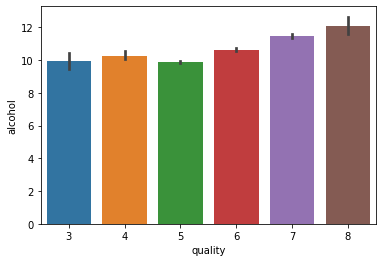

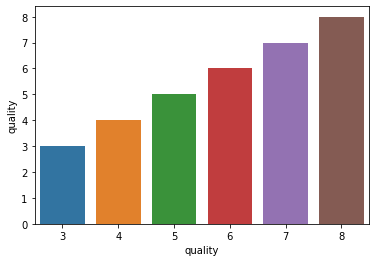

In [7]:
for i,col in dr.items():
  plt.figure(i)
  sns.barplot(x='quality',y=col,data=dr)

In [8]:
corredr=dr.corr()

<AxesSubplot:>

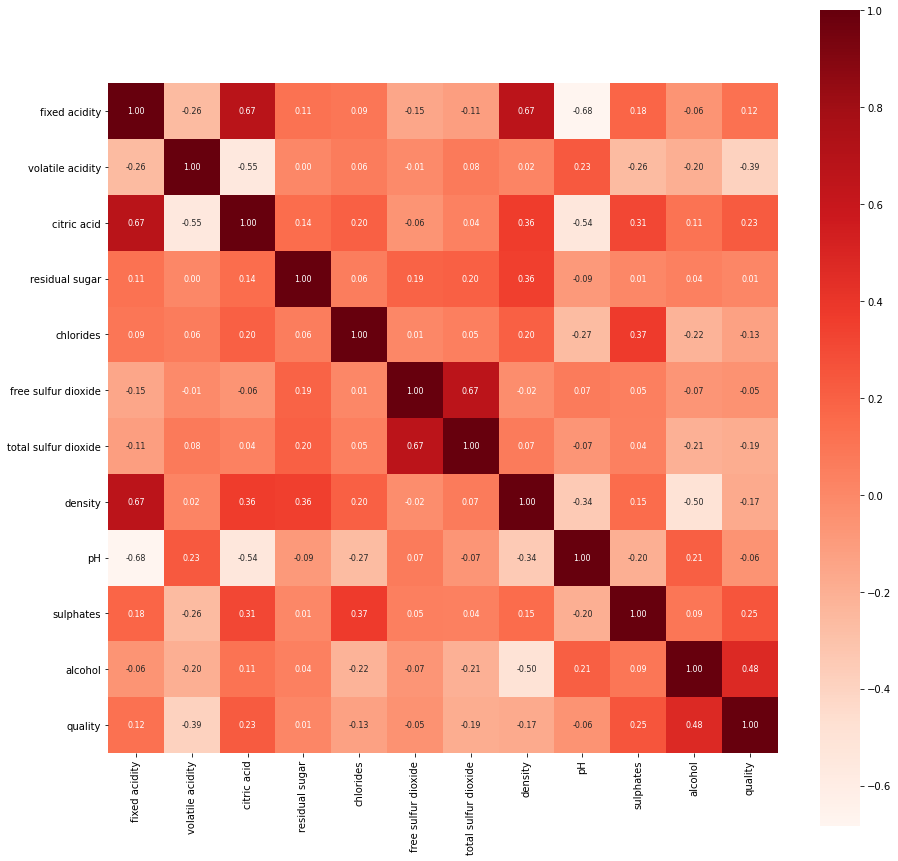

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(corredr,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Reds')

In [10]:
xr=dr.drop('quality',axis=1)

In [11]:
bins=[0,6.5,10]
labels=[0,1]
dr['quality']=pd.cut(dr['quality'],bins=bins,labels=labels)

In [12]:
yr=dr['quality']
print(yr)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: category
Categories (2, int64): [0 < 1]


In [13]:
xrtrain,xrtest,yrtrain,yrtest=train_test_split(xr,yr,test_size=0.2,random_state=0) #taking 20% of test from dataset

In [14]:
print(yrtrain.shape,yrtest.shape)

(1279,) (320,)


In [15]:
modeldr=RandomForestClassifier()

In [16]:
modeldr.fit(xrtrain,yrtrain)

RandomForestClassifier()

In [17]:
xrtestprediction=modeldr.predict(xrtest)
xraccuracy=accuracy_score(xrtestprediction,yrtest)
print(xraccuracy)

0.93125


In [19]:
inputxr=(11.1,0.38,0.46,3.9,0.079,15.0,66.0,0.9980,3.20,0.48,8.8)
inputxrreshape=np.asarray(inputxr).reshape(1,-1)
print(modeldr.predict(inputxrreshape))
ans='B'(#bad quality)
if modeldr.predict(inputxrreshape)==1:
    ans='GOOD QUALITY WINE'

SyntaxError: invalid syntax (<ipython-input-19-15180d2318f0>, line 5)

In [20]:
modeldr2=KNeighborsClassifier()

In [21]:
modeldr2.fit(xrtrain,yrtrain)

KNeighborsClassifier()

In [22]:
xrtestprediction=modeldr2.predict(xrtest)
xraccuracy=accuracy_score(xrtestprediction,yrtest)
print(xraccuracy)

0.90625


In [23]:
modeldr3=RadiusNeighborsRegressor()

In [24]:
modeldr3.fit(xrtrain,yrtrain)

RadiusNeighborsRegressor()